In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from scipy.stats import shapiro
from statsmodels.tsa.seasonal import seasonal_decompose

In [190]:
plt.style.use('seaborn-darkgrid')

# Bitcoin's data

In [191]:
ticker = 'BTC-USD'
url = "https://query1.finance.yahoo.com/v7/finance/download/"+ticker+"?period1=831600000&period2=1657584000&interval=1d&events=history&includeAdjustedClose=true"
btc = pd.read_csv(url)
btc.to_csv('data/btc.csv')
btc.rename({'Adj Close' : 'Bitcoin', 'High' : 'High_Bitcoin', 'Low' : 'Low_Bitcoin', 'Volume' : 'Volume_Bitcoin'}, axis = 1, inplace = True)
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.set_index('Date')
btc

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-07-08  21637.154297  22314.941406  21257.453125  21731.117188   
2022-07-09  21716.828125  21877.138672  21445.957031  21592.207031   
2022-07-10  21591.080078  21591.080078  20727.123047  20860.449219   
2022-07-11  20856.353516  20856.353516  19924.539063  19970.556641   
2022-07-12  19970.474609  20043.445313  19308.531250  19323.914063   

                 Bitcoin  Volume_Bitcoin  
Date                                      
2014-09-17    457.334015        21056800  
2014-09-18    424.440002        34483200  
2014-09-19    394.795990        37919700  
2014-09-20    408.903992        36863600  
2014-09-21    398.821014        26580100  
...                  ...             ...  
2022-07-08  21731.117188     49899834488  
2022-07-09  21592.207031     29641127858  
2022-07-10  20860.449219     28688807249  
2022-07-11  19970.556641     24150249025  
2022-07-12  19323.914063     25810220018  

[2856 rows x 6 columns]

## Valeur du Bitcoin

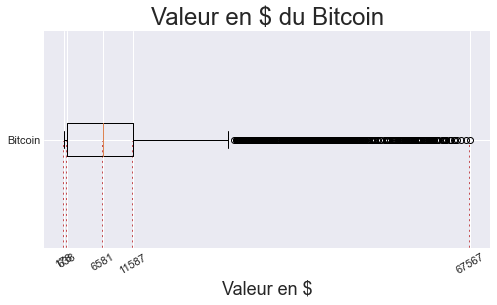

In [192]:
fig = plt.figure(figsize=(8,4))
plt.boxplot(btc['Bitcoin'], vert = False, manage_ticks=True)
plt.yticks([1], labels = ['Bitcoin'])
quantiles = np.quantile(btc['Bitcoin'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
plt.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='r', ls=':', lw=2.0, zorder=0)
plt.ylim(0.5, 1.5)
plt.xticks(quantiles, rotation = 30)
plt.title('Valeur en $ du Bitcoin', fontsize = 24)
plt.xlabel('Valeur en $', fontsize = 18)
plt.savefig('graphiques/P8_04_valeur_bitcoin.png')
plt.show()

## Évolution du cours du bitocin

##### Journalier 

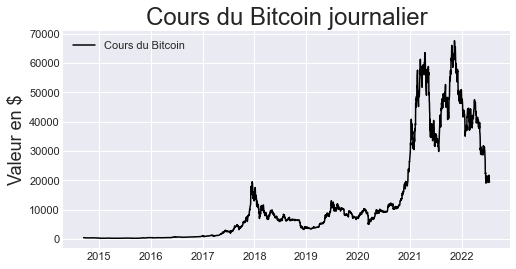

In [193]:
fig = plt.figure(figsize=(8,4))
plt.plot(btc['Bitcoin'], label = 'Cours du Bitcoin', color = 'black')
plt.legend()
plt.title ('Cours du Bitcoin journalier', fontsize = 24) 
plt.ylabel('Valeur en $', fontsize = 18)
plt.savefig('graphiques/P8_05_evolution_valeur_journalier_bitcoin.png')
plt.show()

In [194]:
fig = go.Figure(data=[go.Candlestick(x=btc.index,
                open=btc['Open'], high=btc['High_Bitcoin'],
                low=btc['Low_Bitcoin'], close=btc['Close'])
                      ])

fig.update_layout(
    title='Cours journalier du Bitcoin',
    yaxis_title='Valeur en $',
    xaxis_rangeslider_visible=False,
    font=dict( size=18 ),
    width=800, 
    height=400
)
fig.update_xaxes(title_font_size = 18)
#Un bug touchant certaines distributions windows10  et windows 11 empêche la fonction write_image, permettant la sauvegarde, de fonctionner
#fig.write_image('graphiques/P8_05_evolution_valeur_mensuel_bitcoin.png', engine='kaleido')
fig.show()

##### Mensuel 

In [195]:
url = "https://query1.finance.yahoo.com/v7/finance/download/"+ticker+"?period1=831600000&period2=1657584000&interval=1mo&events=history&includeAdjustedClose=true"
btc_month = pd.read_csv(url)
btc_month.to_csv('data/btc_month.csv')
btc_month.rename({'Adj Close' : 'Bitcoin', 'High' : 'High_Bitcoin', 'Low' : 'Low_Bitcoin', 'Volume' : 'Volume_Bitcoin'}, axis = 1, inplace = True)
btc_month['Date'] = pd.to_datetime(btc_month['Date'])
btc_month = btc_month.set_index('Date')
btc_month

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2014-10-01    387.427002    411.697998    289.295990    338.321014   
2014-11-01    338.649994    457.092987    320.626007    378.046997   
2014-12-01    378.248993    384.037994    304.231995    320.192993   
2015-01-01    320.434998    320.434998    171.509995    217.464005   
2015-02-01    216.867004    265.610992    212.014999    254.263000   
...                  ...           ...           ...           ...   
2022-03-01  43194.503906  48086.835938  37260.203125  45538.675781   
2022-04-01  45554.164063  47313.476563  37697.941406  37714.875000   
2022-05-01  37713.265625  39902.949219  26350.490234  31792.310547   
2022-06-01  31792.554688  31957.285156  17708.623047  19784.726563   
2022-07-01  19820.470703  24196.818359  18966.951172  21239.753906   

                 Bitcoin  Volume_Bitcoin  
Date                                      
2014-10-01    338.321014       902994450  
2014-11-01    378.046997       659733360  
2014-12-01    320.192993       553102310  
2015-01-01    217.464005      1098811912  
2015-02-01    254.263000       711518700  
...                  ...             ...  
2022-03-01  45538.675781    830943838435  
2022-04-01  37714.875000    830115888649  
2022-05-01  31792.310547   1105689315990  
2022-06-01  19784.726563    923939211678  
2022-07-01  21239.753906    768021962055  

[94 rows x 6 columns]

In [196]:
fig = go.Figure(data=[go.Candlestick(x=btc_month.index,
                open=btc_month['Open'], high=btc_month['High_Bitcoin'],
                low=btc_month['Low_Bitcoin'], close=btc_month['Close'])
                      ])

fig.update_layout(
    title='Cours mensuel du Bitcoin',
    yaxis_title='Valeur en $',
    xaxis_rangeslider_visible=False,
    font=dict( size=18 ),
    width=800, 
    height=400
)
fig.update_xaxes(title_font_size = 18)
#Un bug touchant certaines distributions windows10  et windows 11 empêche la fonction write_image, permettant la sauvegarde, de fonctionner
#fig.write_image('graphiques/P8_05_evolution_valeur_mensuel_bitcoin.png', engine='kaleido')
fig.show()

## Volatilité du Bitcoin

### Variation de la valeur journalière du Bitcoin en % 

In [197]:
btc['Variation en %'] = btc['Bitcoin'].pct_change()

In [198]:
ticker = '^GSPC'
url = "https://query1.finance.yahoo.com/v7/finance/download/"+ticker+"?period1=831600000&period2=1657584000&interval=1d&events=history&includeAdjustedClose=true"
snp500 = pd.read_csv(url)
snp500.to_csv('data/snp500.csv')
snp500 = snp500[['Date', 'High', 'Low', 'Adj Close', 'Volume']]
snp500.rename({'Adj Close' : 'S&P500', 'High' : 'High_S&P500', 'Low' : 'Low_S&P500', 'Volume' : 'Volume_S&P500'}, axis = 1, inplace = True)
snp500['Date'] = pd.to_datetime(snp500['Date'])
snp500 = snp500.set_index('Date')
snp500 = snp500[snp500.index >= '2014-09-17']
snp500['Variation en %'] = snp500['S&P500'].pct_change()

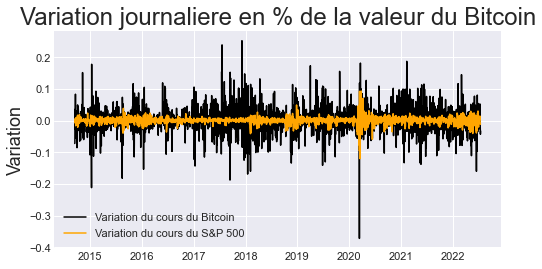

In [199]:
fig = plt.figure(figsize=(8,4))
plt.plot(btc['Variation en %'], label = 'Variation du cours du Bitcoin', color = 'black')
plt.plot(snp500['Variation en %'], label = 'Variation du cours du S&P 500', color = 'orange')
plt.legend()
plt.title('Variation journaliere en % de la valeur du Bitcoin', fontsize = 24)
plt.ylabel('Variation',fontsize = 18)
plt.savefig('graphiques/P8_06_variation_journaliere_bitcoin.png')
plt.show()

In [200]:
btc_min_variations =  btc.sort_values('Variation en %', ascending = True)[0:10]
btc_min_variations

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2020-03-12   7913.616211   7929.116211   4860.354004   4970.788086   
2015-01-14    223.893997    223.893997    171.509995    178.102997   
2017-09-14   3875.370117   3920.600098   3153.860107   3154.949951   
2015-08-18    257.925995    257.993011    211.078995    211.078995   
2018-01-16  13836.099609  13843.099609  10194.900391  11490.500000   
2022-06-13  26737.578125  26795.589844  22141.257813  22487.388672   
2018-02-05   8270.540039   8364.839844   6756.680176   6955.270020   
2015-01-13    267.394012    268.277008    219.906006    225.860992   
2016-01-15    430.255005    430.255005    364.330994    364.330994   
2017-01-11    908.114990    919.447998    762.765015    777.757019   

                 Bitcoin  Volume_Bitcoin  Variation en %  
Date                                                      
2020-03-12   4970.788086     53980357243       -0.371695  
2015-01-14    178.102997        97638704       -0.211449  
2017-09-14   3154.949951      2716310016       -0.187411  
2015-08-18    211.078995        42147200       -0.181788  
2018-01-16  11490.500000     18853799936       -0.168548  
2022-06-13  22487.388672     68204556440       -0.159747  
2018-02-05   6955.270020      9285289984       -0.159688  
2015-01-13    225.860992        72843904       -0.156593  
2016-01-15    364.330994       153351008       -0.153321  
2017-01-11    777.757019       310928992       -0.143136

In [201]:
btc_max_variations = btc.sort_values('Variation en %', ascending = False)[0:10]
btc_max_variations

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2017-12-07  14266.099609  17899.699219  14057.299805  17899.699219   
2017-07-20   2269.889893   2900.699951   2269.889893   2817.600098   
2017-12-06  11923.400391  14369.099609  11923.400391  14291.500000   
2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2020-03-19   5245.416504   6329.735840   5236.968750   6191.192871   
2015-01-15    176.897003    229.067001    176.897003    209.843994   
2019-04-02   4156.919434   4905.954590   4155.316895   4879.877930   
2019-10-25   7490.703125   8691.540039   7479.984375   8660.700195   
2017-07-17   1932.619995   2230.489990   1932.619995   2228.409912   
2017-09-15   3166.300049   3733.449951   2946.620117   3637.520020   

                 Bitcoin  Volume_Bitcoin  Variation en %  
Date                                                      
2017-12-07  17899.699219     17950699520        0.252472  
2017-07-20   2817.600098      2249260032        0.239361  
2017-12-06  14291.500000     12656300032        0.199283  
2021-02-08  46196.464844    101467222687        0.187465  
2020-03-19   6191.192871     51000731797        0.181878  
2015-01-15    209.843994        81773504        0.178217  
2019-04-02   4879.877930     21315047816        0.173560  
2019-10-25   8660.700195     28705065488        0.155763  
2017-07-17   2228.409912      1201760000        0.154724  
2017-09-15   3637.520020      4148069888        0.152956

### Variation mensuelle en %

In [202]:
btc_month['Variation en %'] = btc_month['Bitcoin'].pct_change()

In [203]:
btc_month_min_variations =  btc_month.sort_values('Variation en %', ascending = True)[0:10]
btc_month_min_variations

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2022-06-01  31792.554688  31957.285156  17708.623047  19784.726563   
2018-11-01   6318.140137   6552.160156   3585.060059   4017.268555   
2021-05-01  57714.664063  59519.355469  30681.496094  37332.855469   
2018-03-01  10385.000000  11704.099609   6683.930176   6973.529785   
2015-01-01    320.434998    320.434998    171.509995    217.464005   
2018-01-01  14112.200195  17712.400391   9402.290039  10221.099609   
2020-03-01   8599.758789   9167.695313   4106.980957   6438.644531   
2015-08-01    284.686005    285.714996    199.567001    230.056000   
2018-05-01   9251.469727   9964.500000   7090.680176   7494.169922   
2021-12-01  56907.964844  59041.683594  42874.617188  46306.445313   

                 Bitcoin  Volume_Bitcoin  Variation en %  
Date                                                      
2022-06-01  19784.726563    923939211678       -0.377688  
2018-11-01   4017.268555    158359524484       -0.364116  
2021-05-01  37332.855469   1976593438572       -0.353546  
2018-03-01   6973.529785    193751709184       -0.329333  
2015-01-01    217.464005      1098811912       -0.320835  
2018-01-01  10221.099609    416247858176       -0.277987  
2020-03-01   6438.644531   1290442059648       -0.251278  
2015-08-01    230.056000       905192300       -0.191793  
2018-05-01   7494.169922    197611709696       -0.188991  
2021-12-01  46306.445313    957047184722       -0.187684

In [204]:
btc_month_max_variations = btc_month.sort_values('Variation en %', ascending = False)[0:10]
btc_month_max_variations

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2017-05-01   1348.300049   2763.709961   1348.300049   2286.409912   
2017-08-01   2871.300049   4736.049805   2668.590088   4703.390137   
2019-05-01   5350.914551   9008.314453   5347.645996   8574.501953   
2017-11-01   6440.970215  11517.400391   5519.009766  10233.599609   
2017-10-01   4341.049805   6470.430176   4164.049805   6468.399902   
2020-12-01  19633.769531  29244.876953  17619.533203  29001.720703   
2020-11-01  13780.995117  19749.263672  13243.160156  19625.835938   
2021-10-01  43816.742188  66930.390625  43320.023438  61318.957031   
2017-12-01  10198.599609  20089.000000   9694.650391  14156.400391   
2021-02-01  33114.578125  58330.570313  32384.228516  45137.769531   

                 Bitcoin  Volume_Bitcoin  Variation en %  
Date                                                      
2017-05-01   2286.409912     34261856864        0.696288  
2017-08-01   4703.390137     63548016640        0.635768  
2019-05-01   8574.501953    724157870864        0.602493  
2017-11-01  10233.599609    140735010304        0.582091  
2017-10-01   6468.399902     58009357952        0.490858  
2020-12-01  29001.720703   1212259707946        0.477732  
2020-11-01  19625.835938   1093144913227        0.424123  
2021-10-01  61318.957031   1153077903534        0.400267  
2017-12-01  14156.400391    410336495104        0.383326  
2021-02-01  45137.769531   2267152936675        0.363088

##### Log returns

In [205]:
btc['log_returns'] = np.log(btc['Bitcoin'] / btc['Bitcoin'].shift())
btc

Open  High_Bitcoin   Low_Bitcoin         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-07-08  21637.154297  22314.941406  21257.453125  21731.117188   
2022-07-09  21716.828125  21877.138672  21445.957031  21592.207031   
2022-07-10  21591.080078  21591.080078  20727.123047  20860.449219   
2022-07-11  20856.353516  20856.353516  19924.539063  19970.556641   
2022-07-12  19970.474609  20043.445313  19308.531250  19323.914063   

                 Bitcoin  Volume_Bitcoin  Variation en %  log_returns  
Date                                                                   
2014-09-17    457.334015        21056800             NaN          NaN  
2014-09-18    424.440002        34483200       -0.071926    -0.074643  
2014-09-19    394.795990        37919700       -0.069843    -0.072402  
2014-09-20    408.903992        36863600        0.035735     0.035111  
2014-09-21    398.821014        26580100       -0.024659    -0.024968  
...                  ...             ...             ...          ...  
2022-07-08  21731.117188     49899834488        0.004323     0.004313  
2022-07-09  21592.207031     29641127858       -0.006392    -0.006413  
2022-07-10  20860.449219     28688807249       -0.033890    -0.034477  
2022-07-11  19970.556641     24150249025       -0.042659    -0.043596  
2022-07-12  19323.914063     25810220018       -0.032380    -0.032916  

[2856 rows x 8 columns]

### Volatility

 <font size = 5>Formule de la volativité : log_returns*√jours tradés</size>

In [206]:
volatility = btc['log_returns'].std() * 365**.5
print('La volatilité du Bitcoin est de :', (round(volatility,3)*100),'%')

La volatilité du Bitcoin est de : 74.8 %


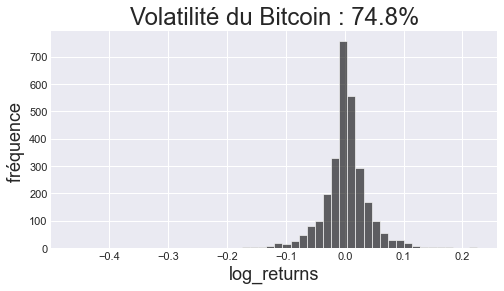

In [207]:
fig = plt.figure(figsize=(8,4))
plt.hist(btc['log_returns'], bins = 50 , alpha =0.6, color='black')
plt.xlabel('log_returns', fontsize = 18)
plt.ylabel('fréquence ', fontsize = 18)
plt.title('Volatilité du Bitcoin : '+ str(round(volatility,3)*100)+'%', fontsize =24)
plt.savefig('graphiques/P8_07_volativite_bitcoin.png')
plt.show()

## Moyennes mobiles

In [208]:
btc['MA_50'] = btc['Bitcoin'].rolling(50).mean()
btc['EMA_50'] = btc['Bitcoin'].ewm(span = 50, adjust = False).mean()
btc['MA_100'] = btc['Bitcoin'].rolling(100).mean()
btc['EMA_100'] = btc['Bitcoin'].ewm(span = 100, adjust = False).mean()
btc['MA_200'] = btc['Bitcoin'].rolling(200).mean()
btc['EMA_200'] = btc['Bitcoin'].ewm(span = 200, adjust = False).mean()

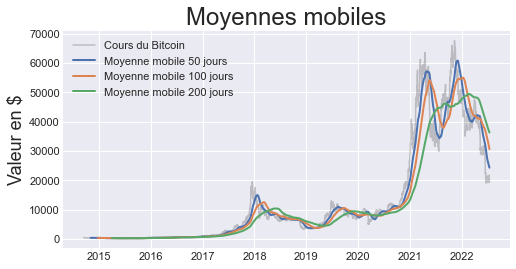

In [209]:
fig = plt.figure(figsize=(8,4))
plt.plot(btc['Bitcoin'], label = 'Cours du Bitcoin', color = 'black', alpha = 0.2)
plt.plot(btc['MA_50'], label = 'Moyenne mobile 50 jours', linewidth=2)
plt.plot(btc['MA_100'], label = 'Moyenne mobile 100 jours', linewidth=2)
plt.plot(btc['MA_200'], label = 'Moyenne mobile 200 jours', linewidth=2)
plt.legend()
plt.title('Moyennes mobiles', fontsize = 24)
plt.ylabel('Valeur en $', fontsize = 18)
plt.savefig('graphiques/P8_08_moyennes_mobiles_bitcoin.png')
plt.show()

##### Moyennes mobiles exponentielles

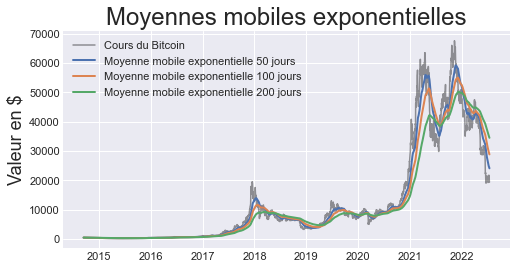

In [210]:
fig = plt.figure(figsize=(8,4))
plt.plot(btc['Bitcoin'], label = 'Cours du Bitcoin', color = 'black', alpha = 0.4)
plt.plot(btc['EMA_50'], label = 'Moyenne mobile exponentielle 50 jours', linewidth=2)
plt.plot(btc['EMA_100'], label = 'Moyenne mobile exponentielle 100 jours', linewidth=2)
plt.plot(btc['EMA_200'], label = 'Moyenne mobile exponentielle 200 jours', linewidth=2)
plt.legend()
plt.title('Moyennes mobiles exponentielles', fontsize = 24)
plt.ylabel('Valeur en $', fontsize = 18)
plt.savefig('graphiques/P8_09_moyennes_mobiles_exponentielles_bitcoin.png')
plt.show()

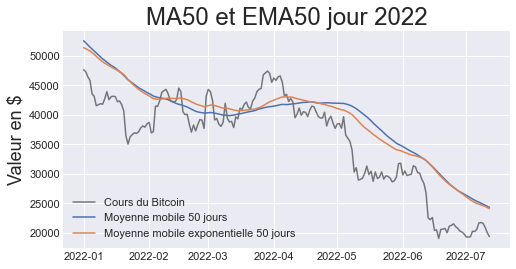

In [211]:
btc_2022 = btc[btc.index>= '2022-01-01']
fig = plt.figure(figsize=(8,4))
plt.plot(btc_2022['Bitcoin'], label = 'Cours du Bitcoin', color = 'black', alpha = 0.5)
plt.plot(btc_2022['MA_50'], label = 'Moyenne mobile 50 jours')
plt.plot(btc_2022['EMA_50'], label = 'Moyenne mobile exponentielle 50 jours')
plt.legend()
plt.title('MA50 et EMA50 jour 2022', fontsize = 24)
plt.ylabel('Valeur en $', fontsize = 18)
plt.savefig('graphiques/P8_10_moyennes_mobiles_bitcoin_2022.png')
plt.show()

## Tendance

Pour isoler la tendance de notre cours nous allons utiliser la fonction seasonal_decompose() de la librairie statsmodels sur notre série temporelle à l'échelle logarithimique.

In [212]:
btc['log_value'] = np.log(btc['Bitcoin'])
y_decompose = seasonal_decompose(btc['log_value'], model = 'additive', period = 365)

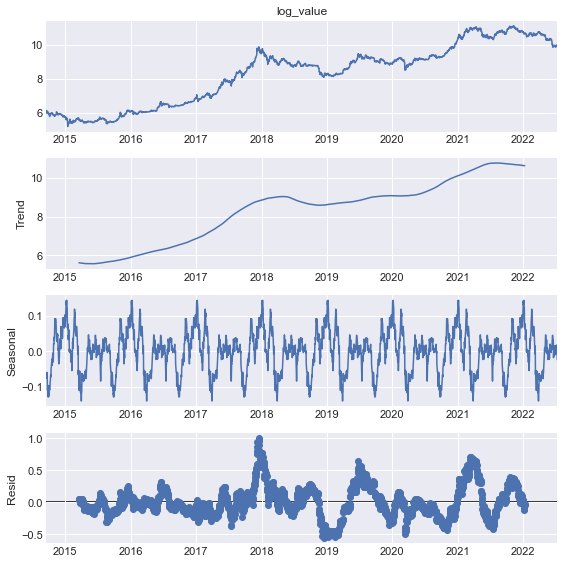

In [213]:
sns.set(rc={'figure.figsize':(8,8)})
with plt.style.context('seaborn-darkgrid'):
    y_decompose.plot()
    plt.savefig('graphiques/P8_11_bitcoin_seasonal_decompose.png')
    plt.show()

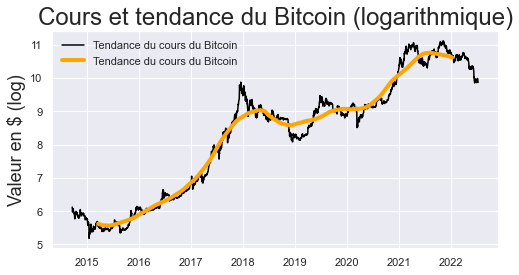

In [214]:
fig = plt.figure(figsize=(8,4))
plt.plot(y_decompose.observed, label = 'Tendance du cours du Bitcoin', color = 'black')
plt.plot(y_decompose.trend, label = 'Tendance du cours du Bitcoin', color = 'orange', linewidth=4)
plt.legend()
plt.title("Cours et tendance du Bitcoin (logarithmique)", fontsize = 24)
plt.ylabel('Valeur en $ (log)', fontsize = 18)
plt.savefig('graphiques/P8_12_cours_et_tendance_bitcoin_log.png')
plt.show()

# Bitcoin face au S&P 500

In [215]:
ticker = '^GSPC'
url = "https://query1.finance.yahoo.com/v7/finance/download/"+ticker+"?period1=831600000&period2=1657584000&interval=1mo&events=history&includeAdjustedClose=true"
snp500_month = pd.read_csv(url)
snp500_month.to_csv('data/snp500_month.csv')
snp500_month = snp500_month[['Date', 'High', 'Low', 'Adj Close', 'Volume']]
snp500_month.rename({'Adj Close' : 'S&P500', 'High' : 'High_S&P500', 'Low' : 'Low_S&P500', 'Volume' : 'Volume_S&P500'}, axis = 1, inplace = True)
snp500_month['Date'] = pd.to_datetime(snp500_month['Date'])
snp500_month = snp500_month.set_index('Date')
snp500_month = snp500_month[snp500_month.index >= '2014-09-17']
snp500_month['Variation en %'] = snp500_month['S&P500'].pct_change()

In [216]:
snp500_month['log_value_snp500'] = np.log(snp500_month['S&P500'])
btc_month['log_value_btc'] = np.log(btc_month['Bitcoin'])
snp500_month

High_S&P500   Low_S&P500       S&P500  Volume_S&P500  \
Date                                                               
2014-10-01  2018.189941  1820.660034  2018.050049    93714040000   
2014-11-01  2075.760010  2001.010010  2067.560059    63600190000   
2014-12-01  2093.550049  1972.560059  2058.899902    80743820000   
2015-01-01  2072.360107  1988.119995  1994.989990    77330040000   
2015-02-01  2119.590088  1980.900024  2104.500000    68775560000   
...                 ...          ...          ...            ...   
2022-03-01  4637.299805  4157.870117  4530.410156   100978320000   
2022-04-01  4593.450195  4124.279785  4131.930176    74784850000   
2022-05-01  4307.660156  3810.320068  4132.149902    89128130000   
2022-06-01  4177.509766  3636.870117  3785.379883    86799060000   
2022-07-01  4012.439941  3721.560059  3921.050049    53597920000   

            Variation en %  log_value_snp500  
Date                                          
2014-10-01             NaN          7.609887  
2014-11-01        0.024534          7.634124  
2014-12-01       -0.004189          7.629927  
2015-01-01       -0.031041          7.598394  
2015-02-01        0.054893          7.651833  
...                    ...               ...  
2022-03-01        0.035773          8.418568  
2022-04-01       -0.087957          8.326500  
2022-05-01        0.000053          8.326553  
2022-06-01       -0.083920          8.238902  
2022-07-01        0.035841          8.274115  

[94 rows x 6 columns]

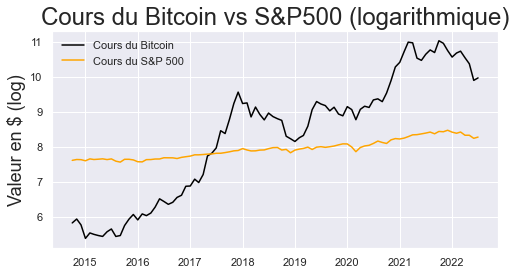

In [217]:
fig = plt.figure(figsize=(8,4))
plt.plot(btc_month['log_value_btc'], label = 'Cours du Bitcoin', color = 'black')
plt.plot(snp500_month['log_value_snp500'], label = 'Cours du S&P 500', color = 'orange')
plt.legend()
plt.title ("Cours du Bitcoin vs S&P500 (logarithmique)", fontsize = 24)
plt.ylabel('Valeur en $ (log)', fontsize = 18)
plt.savefig('graphiques/P8_13_cours_bitcoin_snp500.png')
plt.show()

In [218]:
len(btc), len(snp500)

(2856, 1967)

In [219]:
btc.head(21)

Open  High_Bitcoin  Low_Bitcoin       Close     Bitcoin  \
Date                                                                        
2014-09-17  465.864014    468.174011   452.421997  457.334015  457.334015   
2014-09-18  456.859985    456.859985   413.104004  424.440002  424.440002   
2014-09-19  424.102997    427.834991   384.532013  394.795990  394.795990   
2014-09-20  394.673004    423.295990   389.882996  408.903992  408.903992   
2014-09-21  408.084991    412.425995   393.181000  398.821014  398.821014   
2014-09-22  399.100006    406.915985   397.130005  402.152008  402.152008   
2014-09-23  402.092010    441.557007   396.196991  435.790985  435.790985   
2014-09-24  435.751007    436.112000   421.131989  423.204987  423.204987   
2014-09-25  423.156006    423.519989   409.467987  411.574005  411.574005   
2014-09-26  411.428986    414.937988   400.009003  404.424988  404.424988   
2014-09-27  403.556000    406.622986   397.372009  399.519989  399.519989   
2014-09-28  399.471008    401.016998   374.332001  377.181000  377.181000   
2014-09-29  376.928009    385.210999   372.239990  375.467010  375.467010   
2014-09-30  376.088013    390.976990   373.442993  386.944000  386.944000   
2014-10-01  387.427002    391.378998   380.779999  383.614990  383.614990   
2014-10-02  383.988007    385.497009   372.946014  375.071991  375.071991   
2014-10-03  375.181000    377.695007   357.859009  359.511993  359.511993   
2014-10-04  359.891998    364.487000   325.885986  328.865997  328.865997   
2014-10-05  328.915985    341.800995   289.295990  320.510010  320.510010   
2014-10-06  320.389008    345.134003   302.559998  330.079010  330.079010   
2014-10-07  330.584015    339.247009   320.481995  336.187012  336.187012   

            Volume_Bitcoin  Variation en %  log_returns  MA_50      EMA_50  \
Date                                                                         
2014-09-17        21056800             NaN          NaN    NaN  457.334015   
2014-09-18        34483200       -0.071926    -0.074643    NaN  456.044054   
2014-09-19        37919700       -0.069843    -0.072402    NaN  453.642169   
2014-09-20        36863600        0.035735     0.035111    NaN  451.887731   
2014-09-21        26580100       -0.024659    -0.024968    NaN  449.806683   
2014-09-22        24127600        0.008352     0.008317    NaN  447.937872   
2014-09-23        45099500        0.083647     0.080333    NaN  447.461524   
2014-09-24        30627700       -0.028881    -0.029306    NaN  446.510287   
2014-09-25        26814400       -0.027483    -0.027868    NaN  445.140237   
2014-09-26        21460800       -0.017370    -0.017523    NaN  443.543560   
2014-09-27        15029300       -0.012128    -0.012202    NaN  441.817146   
2014-09-28        23613300       -0.055915    -0.057539    NaN  439.282395   
2014-09-29        32497700       -0.004544    -0.004555    NaN  436.779831   
2014-09-30        34707300        0.030567     0.030109    NaN  434.825484   
2014-10-01        26229400       -0.008603    -0.008641    NaN  432.817230   
2014-10-02        21777700       -0.022270    -0.022521    NaN  430.552711   
2014-10-03        30901200       -0.041485    -0.042370    NaN  427.766800   
2014-10-04        47236500       -0.085243    -0.089097    NaN  423.888337   
2014-10-05        83308096       -0.025408    -0.025737    NaN  419.834285   
2014-10-06        79011800        0.029856     0.029419    NaN  416.314470   
2014-10-07        49199900        0.018505     0.018336    NaN  413.172217   

            MA_100     EMA_100  MA_200     EMA_200  log_value  
Date                                                           
2014-09-17     NaN  457.334015     NaN  457.334015   6.125414  
2014-09-18     NaN  456.682648     NaN  457.006711   6.050771  
2014-09-19     NaN  455.457170     NaN  456.387699   5.978369  
2014-09-20     NaN  454.535325     NaN  455.915225   6.013480  
2014-09-21     NaN  453.432071     NaN  455.347123   5.988513  
201

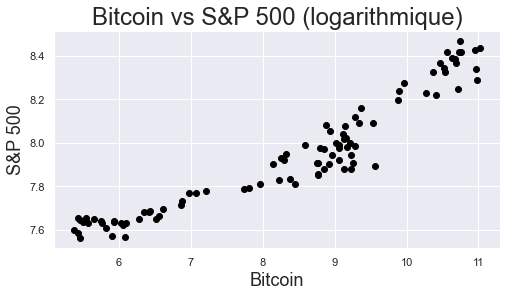

In [220]:
fig = plt.figure(figsize=(8,4))
plt.scatter(btc_month['log_value_btc'],snp500_month['log_value_snp500'], color = 'black')
plt.title("Bitcoin vs S&P 500 (logarithmique)", fontsize = 24)
plt.xlabel('Bitcoin', fontsize = 18)
plt.ylabel('S&P 500', fontsize = 18)
plt.savefig('graphiques/P8_14_nuage_bitcoin_snp500.png')
plt.show()

In [221]:
round(btc_month['log_value_btc'].corr(snp500_month['log_value_snp500'], method = 'pearson') * 100, 2)

94.54

In [222]:
round(btc_month['Bitcoin'].corr(snp500_month['S&P500'], method = 'pearson') * 100, 2)

92.12